In [144]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

In [145]:
#read data
source = pd.read_csv('data_noah.csv')
data = source[['x','y','pitch_type']]
#replace pitch_type to numbers
data = data.replace("CH","0")
data = data.replace("FF","1")
data = data.replace("CU","2")

In [146]:
#select feature
f1 = data['x'].values
f2 = data['y'].values
X_ori = data.values
X = X_ori[:,0:2]
X = X.astype(float)
target = X_ori[:,2]
target = target.astype(float)
k=3

x :  [8.772388334549944, -1.92753183025558, -5.864938578235353]
y :  [11.593149728113907, 12.039029544109336, -3.421305046088942]


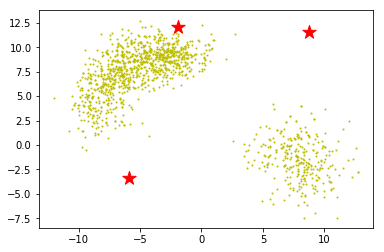

In [147]:
#choose three random points
x_cen = [];
for i in range (3):
    x_cen.append(random.uniform(np.min(X[:,0]), np.max(X[:,0])))
y_cen = []
for i in range (3):
    y_cen.append(random.uniform(np.min(X[:,1]), np.max(X[:,1])))
print("x : ", x_cen)
print("y : ", y_cen)
C = np.dstack((x_cen,y_cen))
C = C[0]
plt.scatter(f1, f2, c='y', s=1)
plt.scatter(x_cen, y_cen, marker='*', s=200, c='r')
C_arg = np.argsort(C[:,0])
C = C[C_arg]


In [148]:
#repeat calculating the means of each cluster until it converges
pitch_type = np.zeros(len(X))
C_origin = np.zeros(C.shape)
f=0
while np.linalg.norm(C - C_origin, None) !=0:
    f=f+1
    cost=0
    for i in range(len(X)):
        dis = np.linalg.norm(X[i] - C, axis=1)
        pitch_type[i] = np.where(dis==np.min(dis))[0][0]
    C_origin = C.copy()
    for i in range(k):
        points = [X[j] for j in range(len(X)) if pitch_type[j] == i]
        C[i] = np.mean(points, axis=0)
    C_arg = np.argsort(C[:,0])
    C = C[C_arg]
    
####cost function
    for i in range(k):
        points2 = np.array([X[j] for j in range(len(X)) if pitch_type[j] == i])
        x_distance = points2[:,0] - C[i,0]
        x_distance_power = np.power(x_distance,2)
        y_distance = points2[:,1] - C[i,1]
        y_distance_power = np.power(y_distance,2)
        distance = np.sum(x_distance_power) + np.sum(y_distance_power)
        costi = distance / points2[:,0].size
        cost += costi
    print('%2d' %f," cost = ",round(cost,6))


 1  cost =  217.450046
 2  cost =  111.628087
 3  cost =  19.12643
 4  cost =  18.692223
 5  cost =  18.593864
 6  cost =  18.521015
 7  cost =  18.515944
 8  cost =  18.516584
 9  cost =  18.510021
10  cost =  18.512433
11  cost =  18.512433


In [149]:
#accuracy: check the difference between predicted result and target
wrong=0
for i in range(len(target)):
    if target[i]!=pitch_type[i]:
        wrong = wrong+1
accuracy = 1-(wrong/len(target))
print("accuracy =", accuracy)

accuracy = 0.8001514004542014


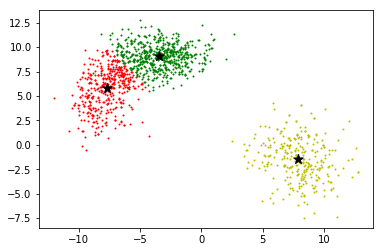

In [150]:
#draw the plot 
colors = ['r', 'g', 'y']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if pitch_type[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=1, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')